In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = './mta_data/'

In [3]:
dname = '200627'
df = pd.read_csv(data_dir+'turnstile_'+dname+'.txt', parse_dates=[['DATE','TIME']])

In [4]:
df.columns = list(map((lambda x: x.strip() if isinstance(x, str) else x), df.columns.values))

In [5]:
# Create UID to uniquely identify a turnstile by (C/A, UNIT, SCP, STATION)
df['TUID'] = pd.factorize(df['C/A'] + df['UNIT'] + df['SCP'] + df['STATION'])[0]

In [6]:
# Create date column to make grouping by date easier
df['DATE'] = df['DATE_TIME'].dt.date

In [7]:
# Sort by turnstile TUID and DATE_TIME
df.sort_values(['TUID','DATE_TIME'])

# Group by TUID and DATE_TIME and calculate deltas between rows
tuid_groups = df.groupby(['TUID'])
df['I_ENTRIES'] = tuid_groups['ENTRIES'].diff().shift(-1)
df['I_EXITS'] = tuid_groups['EXITS'].diff().shift(-1)
df.head(5)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS
0,2020-06-20 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424218,2522558,0,2020-06-20,2.0,1.0
1,2020-06-20 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424220,2522559,0,2020-06-20,11.0,13.0
2,2020-06-20 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424231,2522572,0,2020-06-20,34.0,18.0
3,2020-06-20 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424265,2522590,0,2020-06-20,75.0,14.0
4,2020-06-20 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424340,2522604,0,2020-06-20,75.0,8.0


In [8]:
df.groupby(['TUID', 'DATE'])[['I_ENTRIES','I_EXITS']].sum()

I_ENTRIES  I_EXITS
TUID DATE                          
0    2020-06-20      223.0     64.0
     2020-06-21      143.0     52.0
     2020-06-22      377.0    153.0
     2020-06-23      346.0    139.0
     2020-06-24      368.0    156.0
...                    ...      ...
4942 2020-06-22        0.0      0.0
     2020-06-23        0.0      0.0
     2020-06-24        0.0      0.0
     2020-06-25        0.0      0.0
     2020-06-26        0.0      0.0

[34573 rows x 2 columns]

In [9]:
# Create a SUID to uniquely identify a station
df['SUID'] = df['STATION'] + list(map(lambda x: str(x), pd.factorize(df['STATION'] + df['LINENAME'])[0]))
# df.head()
pd.factorize(df['STATION'] + df['LINENAME'])[0]

array([  0,   0,   0, ..., 478, 478, 478])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

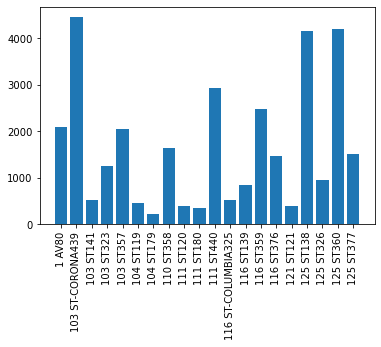

In [10]:
# plot exits vs entries

tmp_df = df[df['DATE']==pd.to_datetime('2020-06-20')].groupby(['SUID','DATE']).sum()
# tmp_df = tmp_df.groupby(['DATE'])
plt_df = tmp_df.head(20)

plt.bar(plt_df.index.get_level_values(0), plt_df['I_ENTRIES'])
plt.xticks(rotation=90)

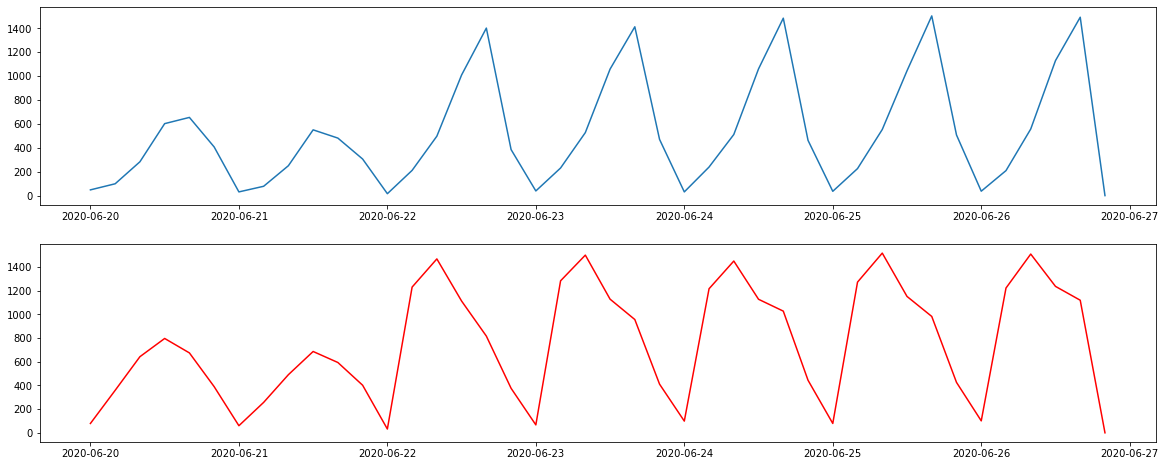

In [11]:
# one station over a week
tmp_sta = df[df['SUID']=='1 AV80'].groupby('DATE_TIME').sum()

fig, ax = plt.subplots(2, 1, figsize=(20, 8))

ax[0].plot(tmp_sta.index, tmp_sta['I_ENTRIES'])
ax[1].plot(tmp_sta.index, tmp_sta['I_EXITS'], c='red')

# plt.figure(figsize=[15,2])
# plt.plot(tmp_sta.index, tmp_sta['I_ENTRIES'])
# plt.xticks(rotation=90)

In [12]:
df.head(50)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS,SUID
0,2020-06-20 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424218,2522558,0,2020-06-20,2.0,1.0,59 ST0
1,2020-06-20 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424220,2522559,0,2020-06-20,11.0,13.0,59 ST0
2,2020-06-20 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424231,2522572,0,2020-06-20,34.0,18.0,59 ST0
3,2020-06-20 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424265,2522590,0,2020-06-20,75.0,14.0,59 ST0
4,2020-06-20 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424340,2522604,0,2020-06-20,75.0,8.0,59 ST0
5,2020-06-20 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424415,2522612,0,2020-06-20,26.0,10.0,59 ST0
6,2020-06-21 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424441,2522622,0,2020-06-21,2.0,1.0,59 ST0
7,2020-06-21 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424443,2522623,0,2020-06-21,14.0,5.0,59 ST0
8,2020-06-21 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424457,2522628,0,2020-06-21,14.0,17.0,59 ST0
9,2020-06-21 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424471,2522645,0,2020-06-21,32.0,11.0,59 ST0


In [13]:
len(df['TUID'].unique())

4943

In [14]:
df.groupby(['SUID', 'DATE'])[['I_ENTRIES','I_EXITS']].sum()

I_ENTRIES  I_EXITS
SUID         DATE                          
1 AV80       2020-06-20     2093.0   2943.0
             2020-06-21     1696.0   2491.0
             2020-06-22     3519.0   5038.0
             2020-06-23     3737.0   5349.0
             2020-06-24     3787.0   5367.0
...                            ...      ...
ZEREGA AV413 2020-06-22      690.0    836.0
             2020-06-23      691.0    814.0
             2020-06-24      630.0    769.0
             2020-06-25      609.0    779.0
             2020-06-26      682.0    682.0

[3353 rows x 2 columns]

In [15]:
df = df.dropna()

In [16]:
df.groupby(df['DATE_TIME'].dt.date).sum()

,ENTRIES,EXITS,TUID,I_ENTRIES,I_EXITS
DATE_TIME,,,,,
2020-06-20,1272296585554,1043483293420,72845568,-7780355.0,-10269489.0
2020-06-21,1272751070005,1044149120980,72935020,-6493089.0,-662974.0
2020-06-22,1271628789305,1043402315748,73029706,6103.0,541187.0
2020-06-23,1274254354458,1049628180558,72936618,137570.0,1087552.0
2020-06-24,1272412155090,1045272535021,72852303,452819.0,542238.0
2020-06-25,1266760684767,1039450943467,72823318,-1430237.0,-471485.0
2020-06-26,1057796752618,867460580931,60621832,-15170760.0,-3062900.0


In [17]:
tmp = df[df['DATE']==pd.to_datetime('2020-06-20')]

In [18]:
tmp[tmp['I_ENTRIES'] < 0].tail(50)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS,SUID
112184,2020-06-20 20:00:00,N606,R025,00-00-01,JAMAICA CENTER,EJZ,IND,REGULAR,1205711594,6172367,2673,2020-06-20,-27.0,197.0,JAMAICA CENTER275
117971,2020-06-20 03:32:36,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,2,13,2814,2020-06-20,-2.0,-7.0,JOURNAL SQUARE282
135168,2020-06-20 00:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964804,1510464352,3237,2020-06-20,-13.0,-13.0,14 ST308
135169,2020-06-20 04:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964791,1510464339,3237,2020-06-20,-23.0,-27.0,14 ST308
135170,2020-06-20 08:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964768,1510464312,3237,2020-06-20,-56.0,-60.0,14 ST308
135171,2020-06-20 12:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964712,1510464252,3237,2020-06-20,-99.0,-59.0,14 ST308
135172,2020-06-20 16:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964613,1510464193,3237,2020-06-20,-98.0,-32.0,14 ST308
135173,2020-06-20 20:00:00,R127,R105,00-00-00,14 ST,123FLM,IRT,REGULAR,1224964515,1510464161,3237,2020-06-20,-84.0,-33.0,14 ST308
137730,2020-06-20 02:00:00,R138,R293,00-03-00,34 ST-PENN STA,123ACE,IRT,REGULAR,97876509,1154713993,3298,2020-06-20,-3.0,0.0,34 ST-PENN STA313
137731,2020-06-20 06:00:00,R138,R293,00-03-00,34 ST-PENN STA,123ACE,IRT,REGULAR,97876506,1154713993,3298,2020-06-20,-9.0,-21.0,34 ST-PENN STA313


In [19]:
# tmp[tmp['I_ENTRIES'] < 0].head(50)
df[df['TUID']==2814].head(50)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS,SUID
117971,2020-06-20 03:32:36,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,2,13,2814,2020-06-20,-2.0,-7.0,JOURNAL SQUARE282
117972,2020-06-20 08:46:40,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,0,6,2814,2020-06-20,2.0,21.0,JOURNAL SQUARE282
117973,2020-06-20 12:47:41,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,2,27,2814,2020-06-20,4.0,17.0,JOURNAL SQUARE282
117974,2020-06-20 16:59:41,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,6,44,2814,2020-06-20,0.0,13.0,JOURNAL SQUARE282
117975,2020-06-20 21:11:41,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,6,57,2814,2020-06-20,0.0,13.0,JOURNAL SQUARE282
117976,2020-06-21 01:32:39,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,6,70,2814,2020-06-21,0.0,2.0,JOURNAL SQUARE282
117977,2020-06-21 05:42:25,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,6,72,2814,2020-06-21,1.0,11.0,JOURNAL SQUARE282
117978,2020-06-21 09:54:25,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,7,83,2814,2020-06-21,-7.0,-83.0,JOURNAL SQUARE282
117979,2020-06-21 15:23:41,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,0,0,2814,2020-06-21,0.0,12.0,JOURNAL SQUARE282
117980,2020-06-21 20:26:04,PTH03,R552,00-05-01,JOURNAL SQUARE,1,PTH,REGULAR,0,12,2814,2020-06-21,1.0,18.0,JOURNAL SQUARE282


In [20]:
nonzero_df = df[(df['I_ENTRIES'] >= 0) & (df['I_EXITS'] >= 0)]
# df[(df['I_ENTRIES'] < 0) | (df['I_EXITS'] < 0)]

In [21]:
nonzero_df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS,SUID
0,2020-06-20 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424218,2522558,0,2020-06-20,2.0,1.0,59 ST0
1,2020-06-20 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424220,2522559,0,2020-06-20,11.0,13.0,59 ST0
2,2020-06-20 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424231,2522572,0,2020-06-20,34.0,18.0,59 ST0
3,2020-06-20 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424265,2522590,0,2020-06-20,75.0,14.0,59 ST0
4,2020-06-20 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424340,2522604,0,2020-06-20,75.0,8.0,59 ST0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206665,2020-06-26 01:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-26,0.0,0.0,RIT-ROOSEVELT478
206666,2020-06-26 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-26,0.0,0.0,RIT-ROOSEVELT478
206667,2020-06-26 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-26,0.0,0.0,RIT-ROOSEVELT478
206668,2020-06-26 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-26,0.0,0.0,RIT-ROOSEVELT478


In [22]:
df[df['DATE_TIME'].dt.date ==pd.to_datetime('2020-06-20')]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TUID,DATE,I_ENTRIES,I_EXITS,SUID
0,2020-06-20 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424218,2522558,0,2020-06-20,2.0,1.0,59 ST0
1,2020-06-20 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424220,2522559,0,2020-06-20,11.0,13.0,59 ST0
2,2020-06-20 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424231,2522572,0,2020-06-20,34.0,18.0,59 ST0
3,2020-06-20 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424265,2522590,0,2020-06-20,75.0,14.0,59 ST0
4,2020-06-20 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7424340,2522604,0,2020-06-20,75.0,8.0,59 ST0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206630,2020-06-20 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-20,0.0,0.0,RIT-ROOSEVELT478
206631,2020-06-20 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-20,0.0,0.0,RIT-ROOSEVELT478
206632,2020-06-20 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-20,0.0,0.0,RIT-ROOSEVELT478
206633,2020-06-20 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,514,4942,2020-06-20,0.0,0.0,RIT-ROOSEVELT478


In [23]:
df.groupby([df['SUID'],df['DATE_TIME'].dt.date]).sum().reset_index()

,SUID,DATE_TIME,ENTRIES,EXITS,TUID,I_ENTRIES,I_EXITS
0,1 AV80,2020-06-20,2768773585,2819012957,92700,2093.0,2943.0
1,1 AV80,2020-06-21,2768785598,2819029355,92700,1696.0,2491.0
2,1 AV80,2020-06-22,2768798810,2819052066,92700,3519.0,5038.0
3,1 AV80,2020-06-23,2768820318,2819082949,92700,3737.0,5349.0
4,1 AV80,2020-06-24,2768842760,2819114854,92700,3787.0,5367.0
...,...,...,...,...,...,...,...
3348,ZEREGA AV413,2020-06-22,15314019,9423755,156258,690.0,836.0
3349,ZEREGA AV413,2020-06-23,15318123,9428696,156258,691.0,814.0
3350,ZEREGA AV413,2020-06-24,15322199,9433556,156258,630.0,769.0
3351,ZEREGA AV413,2020-06-25,15325819,9438139,156258,609.0,779.0


In [24]:
from wrangle_data import *

                  datetime    c_a  unit       scp        station linename  \
0      2020-06-13 00:00:00   A002  R051  02-00-00          59 ST  NQR456W   
1      2020-06-13 04:00:00   A002  R051  02-00-00          59 ST  NQR456W   
2      2020-06-13 08:00:00   A002  R051  02-00-00          59 ST  NQR456W   
3      2020-06-13 12:00:00   A002  R051  02-00-00          59 ST  NQR456W   
4      2020-06-13 16:00:00   A002  R051  02-00-00          59 ST  NQR456W   
...                    ...    ...   ...       ...            ...      ...   
413404 2020-06-26 01:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R   
413405 2020-06-26 05:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R   
413406 2020-06-26 09:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R   
413407 2020-06-26 13:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R   
413408 2020-06-26 17:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R   

       division     desc  entries    exits  tuid  suid  net_entries  net_ex

In [29]:
test = read_files(['2020-06-27', '2020-06-20'])

In [30]:
test = calc_nets(clean(test))

In [35]:
test.head()

,datetime,c_a,unit,scp,station,linename,division,desc,entries,exits,tuid,suid,net_entries,net_exits
0,2020-06-13 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7422382,2521781,0,0,5,1
1,2020-06-13 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7422387,2521782,0,0,17,12
2,2020-06-13 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7422404,2521794,0,0,21,21
3,2020-06-13 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7422425,2521815,0,0,59,16
4,2020-06-13 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7422484,2521831,0,0,58,13
